In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Phase I 
# 1) Load Data
X_train= pd.read_csv('X_train.txt', sep=" ", header=None)
y_train= pd.read_csv('y_train.txt',sep=" ",header=None)
X_test=pd.read_csv('X_test.txt', sep=" ", header=None)
y_test=pd.read_csv('y_test.txt', sep=" ",header=None)


In [3]:
y_label=pd.read_csv('activity_labels.txt',header=None)
y_label[1]=y_label[0].apply((lambda x:x[0])).apply(lambda x:int(x))
col_name=pd.read_csv('features.txt',header=None)
#y=pd.merge(y_train,y_label,on=index)
y_trainn=pd.merge(y_train, y_label, left_on=[0], right_on=[1])
y_trains=y_trainn['0_y']


In [40]:
#X_train.columns = col_name[0]
#X_train.head().to_clipboard()
#X_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [4]:
# 2)*train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
X_train,y_train, test_size=0.20, random_state=0, shuffle = True)

In [5]:
#3) identify if there is missing data
# Concatenate train & test


dataset = pd.concat(objs=[X_train, X_test], axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10929 entries, 0 to 3161
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 46.9 MB


In [6]:
total=dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
560,0,0.0
183,0,0.0
189,0,0.0
188,0,0.0
187,0,0.0


In [5]:
# 4)*using ‘k-NN impute' to fill missing data
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
print(imputer.fit_transform(X_train))

[[ 0.04357967 -0.00597022 -0.03505434 ... -0.84155851  0.17991281
  -0.05171842]
 [ 0.03948004 -0.00213128 -0.02906736 ... -0.8450924   0.18026111
  -0.04743634]
 [ 0.03997778 -0.00515272 -0.02265071 ... -0.84923013  0.18060956
  -0.04227136]
 ...
 [ 0.03745094 -0.00272442  0.02100941 ... -0.77956634  0.24912145
   0.04707077]
 [ 0.04401105 -0.00453578 -0.0512422  ... -0.78560327  0.24640867
   0.03170003]
 [ 0.06895376  0.00181032 -0.08032343 ... -0.78369253  0.24678499
   0.04298129]]


In [7]:
# 5)identify unbanlance data
m=len(y_train)/12
y_train.groupby([0]).size()



0
1     1226
2     1073
3      987
4     1293
5     1423
6     1413
7       47
8       23
9       75
10      60
11      90
12      57
dtype: int64

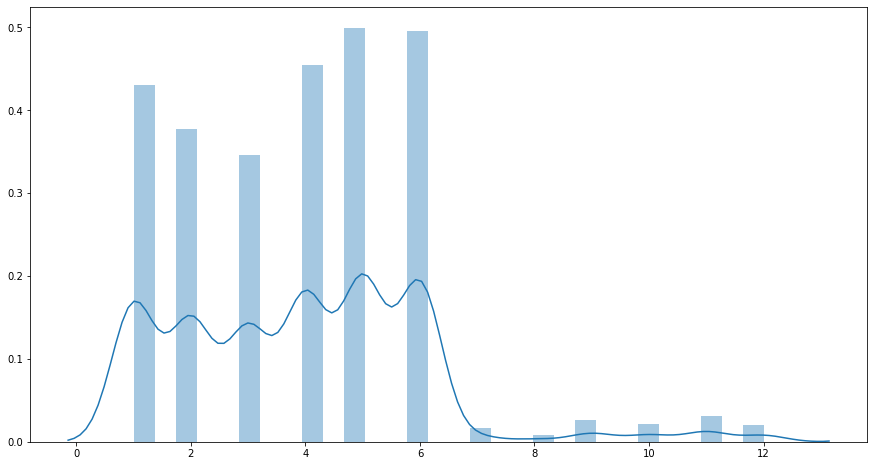

In [8]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(y_train, bins =30)

In [9]:
#6) using SMOTE sampling to make data more balanced

from imblearn.over_sampling import SMOTE
 
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X_train, y_train)
len(X_sm)
X_sm.shape

C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

(17076, 561)

In [10]:
# 7)Identify which columns/variables are numerical and which are categorical


num_cols = dataset._get_numeric_data().columns

num_cols


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            551, 552, 553, 554, 555, 556, 557, 558, 559, 560],
           dtype='int64', length=561)

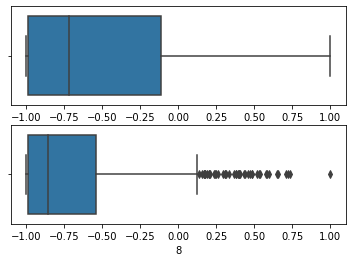

In [11]:
#8.1) identify outlier, change outliers
import seaborn as sns
plt.subplot(2,1,1)
sns.boxplot(X_train)
plt.subplot(2,1,2)
sns.boxplot(X_train[8])



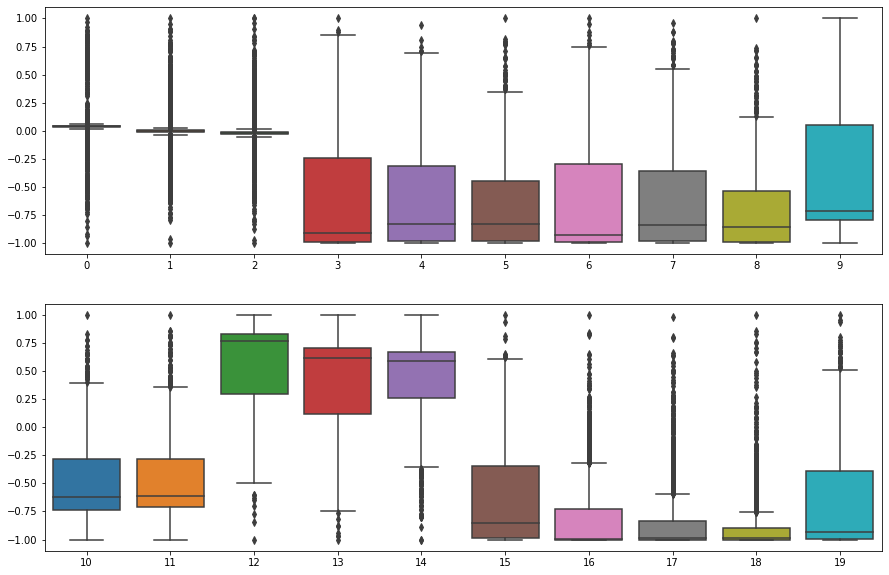

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(data=X_train.iloc[:,0:10])
plt.subplot(2,1,2)
sns.boxplot(data=X_train.iloc[:,10:20])


In [13]:
X_train[8].describe()

count    7767.000000
mean       -0.740154
std         0.272619
min        -1.000000
25%        -0.986661
50%        -0.852735
75%        -0.540521
max         1.000000
Name: 8, dtype: float64

In [14]:
# it looks like there is a lot of outlier
# we will replace the outlier with 75% value if it is too large, with 25% if it is too small
X_train[8]=np.where(X_train[8]>=-0.054,-0.054,X_train[8]

26     -0.248873
41     -0.442101
43     -0.467997
71     -0.308152
78     -0.370015
          ...   
7762   -0.357803
7763   -0.345592
7764   -0.193071
7765   -0.201007
7766   -0.255505
Name: 8, Length: 1943, dtype: float64

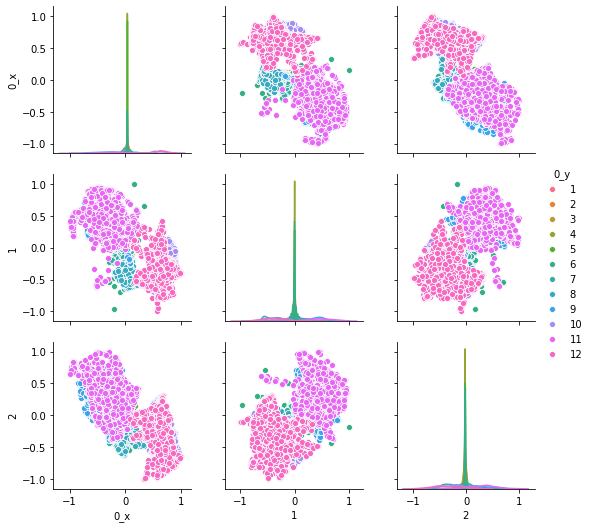

In [15]:
import seaborn as sns
import pandas as pd
new_df = pd.merge(pd.DataFrame(X_sm), pd.DataFrame(y_sm),  how='left', left_index=True, right_index = True)
#new_df.head()
sns.pairplot (new_df,vars=["0_x",1,2],hue='0_y')


In [16]:
#hypothesis, if feature 0>0.9 ,y will be 4, feature0(-0.5-0.9) feature 5
new_dfyy=len(new_df[(new_df[2]>0.5)&(new_df['0_y']==4)])
new_dfyn=len(new_df[(new_df[2]>0.5)&(new_df['0_y']!=4)])
new_dfny=len(new_df[(new_df[2]<0.5)&(new_df['0_y']==4)])
new_dfnn=len(new_df[(new_df[2]<0.5)&(new_df['0_y']!=4)])

import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[new_dfyy,new_dfyn], [new_dfny, new_dfnn]])
pvalue

5.095361738485355e-23

In [14]:
#9)Apply principal components analysis to just input variable
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
x_pca = pca.fit_transform(X_sm)
X_sm.shape, x_pca.shape

((17076, 561), (17076, 14))

In [15]:
# Phase II: Pre-processing
#1)numerical columns
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_trainp=scaler.transform(X_sm)
X_testp=scaler.transform(X_test)
X_trainp

array([[ 4.72690278e-02, -5.32536396e-02, -1.87937459e-01, ...,
        -6.98332451e-01,  4.30793616e-01,  4.23380815e-03],
       [ 7.07236314e-03, -1.48515677e-02, -1.21357287e-01, ...,
        -7.05271912e-01,  4.31951346e-01,  1.97385973e-02],
       [ 1.19527108e-02, -4.50759014e-02, -4.99988185e-02, ...,
        -7.13397137e-01,  4.33109572e-01,  3.84402246e-02],
       ...,
       [ 6.12571033e+00, -4.00326250e+00, -3.01054122e+00, ...,
         1.67442057e+00, -2.88210349e+00, -1.18659218e-01],
       [ 6.98806122e+00, -4.69664355e+00, -3.42347980e+00, ...,
         1.68721227e+00, -2.31224583e+00, -8.74810645e-01],
       [ 5.76813809e+00, -1.27218510e+00, -4.00223708e+00, ...,
         1.87411883e+00, -1.64914668e+00, -1.73629533e+00]])